In [31]:
import pandas as pd
from functions import baza_danych_projektowych_to_csv

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

baza_danych_projektowych_to_csv()
# Import database from excel sheet. It is organized in columns [variable | unit | symbol | value]
# You can set index col (you can take symbol for cleaner formulas)


df8 = pd.read_excel("../../database/ml_projekty.xlsx", sheet_name="Base_pr8", index_col="index")
df8 = df8[17:36]
plane_prop= pd.read_csv("../../database/plane_properties.csv", index_col="Dana")
# display(df.head(10))
df8.columns

# plane_prop[""]


Index(['alpha', 'cz', 'c'x_p', 'a_p [deg]', 'Cmk', 'Cmp1', 'Cmp2', 'Cmp3',
       'Cmbu1', 'Cmbu2', 'Cmbu3'],
      dtype='object')

In [32]:
# Generowanie tablekek z danymi dla azh

df9 = pd.read_excel("../../database/ml_projekty.xlsx", sheet_name="Pr9",  skiprows=6, usecols="D:H")
df9.fillna(0, inplace=True)
df9 = df9[:3]

# in df9 change objet type to float
df9 = df9.astype(float)
df9 = df9.round(3)

# rename columns
print(df9.columns)
df9.columns = ['$x_c$', '$C_{mbu}$', '$\kappa$', '$a_{zh} [rad]$', '$a_{zh} [deg]$']

# save df9 to latex but keep 
with open("../latex_raport/tabelka_azh.tex", "w") as f:
    f.write(df9.to_latex(escape=False, index=False, column_format="ccccc", float_format="{:0.3f}".format))



Index(['xc', 'Cmbu', 'kappa', 'azh [rad]', 'azh [deg]'], dtype='object')


C:\Users\marek\AppData\Local\Temp\ipykernel_2892\2614810547.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df9.to_latex(escape=False, index=False, column_format="ccccc", float_format="{:0.3f}".format))


## Funkcje

In [33]:

def get_prop(variable:str)->float: 
    return float(plane_prop.at[variable, "Wartość"])

# delta_h [rad]
def delta_h(Cmbu, kappa, cz):
    a2 = get_prop("a2")
    a1 = get_prop("a1")
    a = get_prop("a")
    # a = 3.5
    deps_dalpha = get_prop("deps_dalpha")
    azh2 = get_prop("azh_2")
    
    # print(Cmbu, mydict)
    return Cmbu/(kappa*a2)-a1/a2*(cz/a*(1-deps_dalpha)+ azh2)

def get_cz(V:float)->float:
    
    mass=get_prop("mtow") - 50
    g = 9.81
    rho = 1.225
    S = get_prop("S")
    
    return mass*g/(1/2*rho*V**2*S)

def get_v(Cz:float)->float:

    mass=get_prop("mtow") - 50
    g = 9.81
    rho = 1.225
    S = get_prop("S")

    return ( 2*mass*g/(rho*S*Cz) )**(1/2)


def get_delta_kh(alpha_h, delta_h):
    b1 = get_prop("b1")
    b2 = get_prop("b2")
    b3 = get_prop("b3")
    
    return -b1/b3*alpha_h-b2/b3*delta_h

def get_cmzh(alpha_h, delta_h, delta_hk)->float:
    b1 = get_prop("b1")
    b2 = get_prop("b2")
    b3 = get_prop("b3")
    # alpha_h, delta_h, delta_hk = round(float(alpha_h),3), round(float(delta_h),3), round(float(delta_hk),3)
    
    
    # print('cmzh',b1,b2,b3)
    # print("b1*alpha_h + b2*delta_h + b3*delta_hk")
    # print(f"{b1}*{alpha_h} + {b2}*{delta_h} + {b3}*{delta_hk}")
    # print(f"{type(b1)}*{type(alpha_h)} + {type(b2)}*{type(delta_h)} + {type(b3)}*{type(delta_hk)}")
    
    
    return b1*alpha_h + b2*delta_h + b3*delta_hk

def pdh_func(v:float, cmzh:float):
    csh = get_prop("śr.c_sh")
    rho = 1.225
    ssh = get_prop("Ssh")
    ksd = get_prop("ksd")
    
    return 1/2*rho*ssh*csh*ksd*v**2*cmzh
    
    

In [34]:
deltas = ["delta_h1","delta_h2","delta_h3"]
kappas = ["kh_1","kh_2","kh_3"]
azhs = ["azh_1","azh_2","azh_3"]
cmbus = ["Cmbu1","Cmbu2","Cmbu3"]

xc = []

## Liczenie delt i wykresy

In [35]:
df8

,alpha,cz,c'x_p,a_p [deg],Cmk,Cmp1,Cmp2,Cmp3,Cmbu1,Cmbu2,Cmbu3
index,,,,,,,,,,,
18,-1.371429,0.073446,0.007098,-1.158104,-0.000569,-0.054706,-0.045158,-0.035610,-0.055275,-0.045727,-0.036179
19,-0.457143,0.152542,0.008018,0.018349,0.001424,-0.064264,-0.044433,-0.024603,-0.062840,-0.043009,-0.023179
20,0.342857,0.271186,0.009585,1.056763,0.004414,-0.079185,-0.043931,-0.008676,-0.074771,-0.039517,-0.004262
21,1.028571,0.344633,0.011596,1.950309,0.006265,-0.089043,-0.044241,0.000561,-0.082779,-0.037976,0.006826
22,2.057143,0.406780,0.015768,3.286811,0.007831,-0.098200,-0.045319,0.007563,-0.090369,-0.037488,0.015393
23,2.857143,0.497175,0.019815,4.315899,0.010109,-0.111343,-0.046711,0.017922,-0.101235,-0.036602,0.028031
24,3.428571,0.598870,0.023037,5.043968,0.012672,-0.126301,-0.048448,0.029406,-0.113629,-0.035776,0.042077
25,4.800000,0.689266,0.031871,6.777570,0.014949,-0.141793,-0.052188,0.037416,-0.126843,-0.037239,0.052366
26,5.942857,0.802260,0.041102,8.232716,0.017797,-0.161048,-0.056754,0.047539,-0.143251,-0.038957,0.065336


In [36]:
# dla jednego ustawienia trymera 
list_delta_h = [i for i in range(3)]
list_delta_kh = [i for i in range(3)]


for delta, kappa, cmbu in zip(deltas, kappas, cmbus):
    # print(get_prop(cmbu), get_prop(kappa))
   
    for i, row in df8.iterrows():
        # get_prop(cmbu), get_prop(kappa), get_prop(azh)
        # print(delta, kappa, azh, cmbu)
        
        df8.at[i, delta] = delta_h(df8.at[i,cmbu], get_prop(kappa),  df8.at[i, "cz"])
        
i = 0
for delta, kappa, cmbu in zip(deltas, kappas, cmbus):
    list_delta_h[i] = delta_h(get_prop(cmbu), get_prop(kappa),  get_cz(plane_prop.at["v_eco", "Wartość"]))
    list_delta_kh[i] = get_delta_kh(get_prop("azh_2"), list_delta_h[i])
    i+=1


                        

In [37]:
import numpy as np
# print(np.rad2deg(list_delta_h))
print(list_delta_kh)
print(np.rad2deg(list_delta_kh))



[0.07038977419973433, 0.033412795558477995, -0.006751996177242113]
[ 4.03303698  1.91441217 -0.38686088]


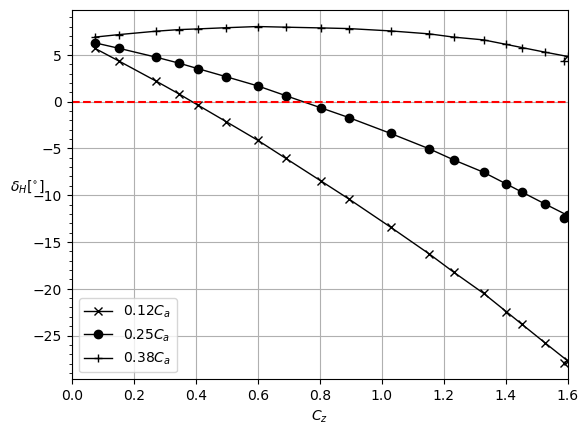

In [38]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.plot(df8['cz'], df8["delta_h1"]*180/3.14, label = "$0.12 C_a$",color = "black", marker = "x", linewidth = 1)
ax.plot(df8['cz'], df8["delta_h2"]*180/3.14, label = "$0.25 C_a$",color = "black", marker = "o", linewidth = 1)
ax.plot(df8['cz'], df8["delta_h3"]*180/3.14, label = "$0.38 C_a$",color = "black", marker = "+", linewidth = 1)

ax.axhline(y=0, color='r', linestyle='--')

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))

# ax.set_title()
ax.set_xlabel("$C_z$")
ax.set_ylabel("$\delta_H [^{\circ}]$", rotation = 0) 
ax.grid(True)
ax.legend()
ax.set_xlim([0, 1.6])

plt.savefig("../latex_raport/imgs/delta_h_cz.jpg", dpi=200)

$\delta_h (V)$  $,V \in (24, 54) ms^{-1}$


In [39]:
df8.columns

Index(['alpha', 'cz', 'c'x_p', 'a_p [deg]', 'Cmk', 'Cmp1', 'Cmp2', 'Cmp3',
       'Cmbu1', 'Cmbu2', 'Cmbu3', 'delta_h1', 'delta_h2', 'delta_h3'],
      dtype='object')

In [40]:
import numpy as np
# velocity range
vel_range = np.arange(24, 54, 0.5)
# cz range depending on velocity
# cz_vel = [get_cz(v) for v in vel_range]




df8["v"] = get_v(df8['cz'])
delta_h_v = df8[['v', 'cz']]

cz_list = get_cz(vel_range)

# delta_h_v = pd.DataFrame()
# delta_h_v["v"] = vel_range
# delta_h_v["cz"] = cz_list



# # delta_h values
# delta_h_v = pd.DataFrame()
# delta_h_v["vel"] = vel_range
# delta_h_v["cz"] = cz_vel
# delta_h_v[""]


In [41]:
delta_h_v

,v,cz
index,,
18,99.134343,0.073446
19,68.788197,0.152542
20,51.591148,0.271186
21,45.764729,0.344633
22,42.123996,0.406780
23,38.102588,0.497175
24,34.717055,0.598870
25,32.360550,0.689266
26,29.995191,0.802260


In [42]:

for delta, kappa, cmbu in zip(deltas, kappas, cmbus):
    # print(get_prop(cmbu), get_prop(kappa))
    for i, row in delta_h_v.iterrows():
        # get_prop(cmbu), get_prop(kappa), get_prop(azh)
        # print(delta, kappa, azh, cmbu)
        delta_h_v.at[i, delta] = delta_h(df8.at[i,cmbu], get_prop(kappa), df8.at[i, "cz"])

C:\Users\marek\AppData\Local\Temp\ipykernel_2892\1222684806.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_h_v.at[i, delta] = delta_h(df8.at[i,cmbu], get_prop(kappa), df8.at[i, "cz"])
C:\Users\marek\AppData\Local\Temp\ipykernel_2892\1222684806.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_h_v.at[i, delta] = delta_h(df8.at[i,cmbu], get_prop(kappa), df8.at[i, "cz"])
C:\Users\marek\AppData\Local\Temp\ipykernel_2892\1222684806.py:6: SettingWithCopyWarning: 
A value is trying to be set on 

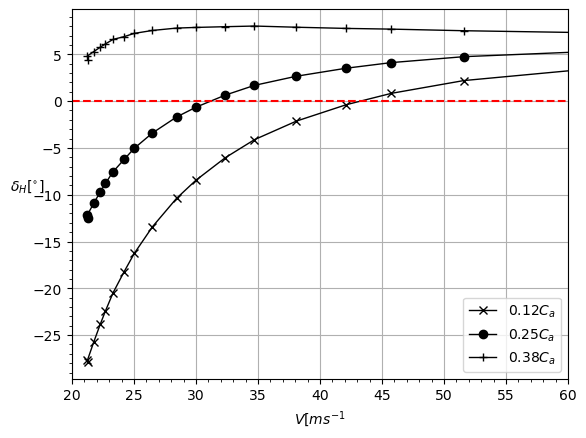

In [43]:
import matplotlib.pyplot as plt


fig,ax = plt.subplots()

ax.plot(delta_h_v["v"], delta_h_v["delta_h1"]*180/3.14, label = "$0.12 C_a$",color = "black", marker = "x", linewidth = 1)
ax.plot(delta_h_v["v"], delta_h_v["delta_h2"]*180/3.14, label = "$0.25 C_a$",color = "black", marker = "o", linewidth = 1)
ax.plot(delta_h_v["v"], delta_h_v["delta_h3"]*180/3.14, label = "$0.38 C_a$",color = "black", marker = "+", linewidth = 1)

ax.axhline(y=0, color='r', linestyle='--')

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))

# ax.set_title()
ax.set_xlabel("$V[ms^{-1}$")
ax.set_ylabel("$\\delta_H [^{\\circ}]$", rotation = 0) 

ax.grid(True)
ax.legend()
ax.set_xlim([20, 60])

plt.savefig("../latex_raport/imgs/delta_h_v.jpg", dpi = 200)

In [44]:
# f = open("../output/delta_h_v_table.txt", "w")
# delta_h_v_deg = delta_h_v
# delta_h_v_deg["delta_h1"] = delta_h_v["delta_h1"]*180/3.14
# delta_h_v_deg["delta_h2"] = delta_h_v["delta_h2"]*180/3.14
# delta_h_v_deg["delta_h3"] = delta_h_v["delta_h3"]*180/3.14

# delta_h_v_deg=delta_h_v_deg.round(3)
    
# delta_h_v_deg= delta_h_v_deg.set_index("vel")
# f.write(delta_h_v_deg.to_latex())
# f.close()

## Siła na drążku

In [45]:
# cz dla prękości ekonomicznej 34
v_H = get_prop("v_cruise")
cz_H = get_cz(v_H)


In [46]:
pdhs = ["pdh1","pdh2","pdh3"]
# print(delta_h_v.dtypes)
for j, pdh in enumerate(pdhs):
    for i, row in delta_h_v.iterrows():
        
        number = pdh.replace("pdh", "")
        key = f'delta_h{number}'
        
        
        delta_h_var = row[key]
    
        
        cmzh = get_cmzh(
            get_prop("azh_2"),
            delta_h_var, 
            list_delta_kh[1]
        )
        
        delta_h_v.at[i, pdh] = pdh_func(row['v'], cmzh)
    

C:\Users\marek\AppData\Local\Temp\ipykernel_2892\2813473335.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_h_v.at[i, pdh] = pdh_func(row['v'], cmzh)
C:\Users\marek\AppData\Local\Temp\ipykernel_2892\2813473335.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_h_v.at[i, pdh] = pdh_func(row['v'], cmzh)
C:\Users\marek\AppData\Local\Temp\ipykernel_2892\2813473335.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [47]:
delta_h_v

,v,cz,delta_h1,delta_h2,delta_h3,pdh1,pdh2,pdh3
index,,,,,,,,
18,99.134343,0.073446,0.099549,0.109672,0.120251,-65.368315,-73.652303,-82.308787
19,68.788197,0.152542,0.075364,0.099273,0.124997,-21.945216,-31.365179,-41.499635
20,51.591148,0.271186,0.038312,0.082868,0.131265,-4.132910,-14.007179,-24.732715
21,45.764729,0.344633,0.014550,0.071853,0.134242,0.891481,-9.101255,-19.980925
22,42.123996,0.406780,-0.006636,0.061407,0.135576,3.885461,-6.167420,-17.125342
23,38.102588,0.497175,-0.037220,0.046455,0.137771,6.876001,-3.238700,-14.277055
24,34.717055,0.598870,-0.071854,0.029398,0.139993,9.183977,-0.977013,-12.075593
25,32.360550,0.689266,-0.105552,0.011202,0.138774,10.917749,0.737708,-10.385658
26,29.995191,0.802260,-0.147530,-0.011393,0.137410,12.524657,2.326384,-8.820702


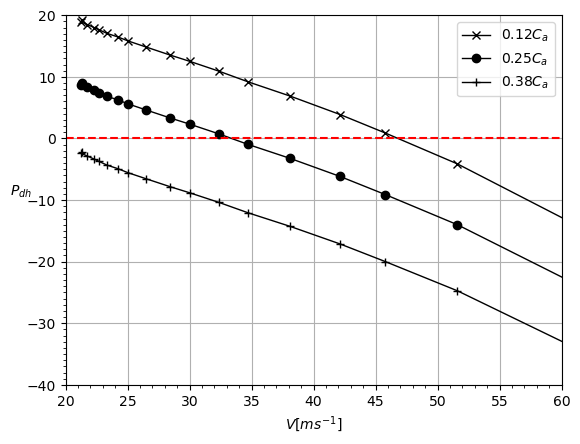

In [48]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

# ["pdh1","pdh2","pdh3"]

ax.plot(delta_h_v["v"], delta_h_v["pdh1"], label = "$0.12 C_a$",color = "black", marker = "x", linewidth = 1)
ax.plot(delta_h_v["v"], delta_h_v["pdh2"], label = "$0.25 C_a$",color = "black", marker = "o", linewidth = 1)
ax.plot(delta_h_v["v"], delta_h_v["pdh3"], label = "$0.38 C_a$",color = "black", marker = "+", linewidth = 1)

ax.axhline(y=0, color='r', linestyle='--')

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))


# ax.set_title()
ax.set_xlabel("$V[ms^{-1}]$")
ax.set_ylabel("$P_{dh}$", rotation = 0) 
ax.grid(True)
ax.legend()
ax.set_xlim([20, 60])
ax.set_ylim([-40, 20])

plt.savefig("../latex_raport/imgs/pdh.jpg", dpi = 200)